In [2]:
import cv2
import numpy as np


def convolve_nest_loop(img, kernel, n):
    iH, iW = img.shape[0], img.shape[1]
    kH, kW = kernel.shape[0], kernel.shape[1]

    for i in range(1, iH - 1):
        for j in range(1, iW - 1):
            sum = 0
            for m in range(0, kH):
                for n in range(0, kW):
                    iP = img[i]
            img[i][j] = (
                img[i - 1][j - 1] * kernel[0][0]
                + img[i - 1][j] * kernel[0][1]
                + img[i - 1][j + 1] * kernel[0][2]
                + img[i][j - 1] * kernel[1][0]
                + img[i][j] * kernel[1][1]
                + img[i][j + 1] * kernel[1][2]
                + img[i + 1][j - 1] * kernel[2][0]
                + img[i + 1][j] * kernel[2][1]
                + img[i + 1][j + 1] * kernel[2][2]
            ) / n
    return img


# kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
# kernel = np.array(np.ones((3, 3)))
# kernel = np.array([[1, 3, 1], [3, 16, 3], [1, 3, 1]])
kernel = np.array([[0, 1, 0], [1, 4, 1], [0, 1, 0]])

cv2.destroyAllWindows()
in_img = cv2.cvtColor(cv2.imread("../Input/TH2/Pepper.png"), cv2.COLOR_BGR2GRAY)
cv2.imshow("Old", in_img)
out_img = convolve_nest_loop(in_img, kernel, 8)
cv2.imshow("New", out_img)
cv2.waitKey()


QApplication: invalid style override 'kvantum' passed, ignoring it.
	Available styles: Windows, Fusion


In [9]:
import cv2

cv2.destroyAllWindows()


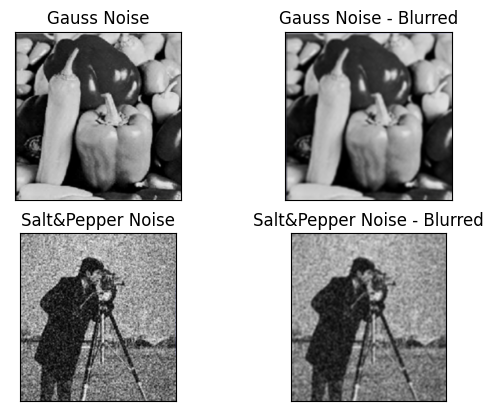

In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Load and blur image
img = cv.imread("../Input/TH2/Pepper.png")
img2 = cv.imread("../Input/TH2/Man1.png")

# kernel = np.matrix([[0, 1, 0], [1, 1, 1], [0, 1, 0]]) / 5
kernel = np.ones((3, 3)) / 9
# kernel = np.matrix([[1, 3, 1], [3, 16, 3], [1, 3, 1]]) / 32
# kernel = np.matrix([[0, 1, 0], [1, 4, 1], [0, 1, 0]]) / 8

blur = cv.filter2D(img, -1, kernel)
blur2 = cv.filter2D(img2, -1, kernel)

# Convert color from bgr (OpenCV default) to rgb
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
blur_rgb = cv.cvtColor(blur, cv.COLOR_BGR2RGB)
img_rgb2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
blur_rgb2 = cv.cvtColor(blur2, cv.COLOR_BGR2RGB)

# Display
plt.subplot(221), plt.imshow(img_rgb), plt.title("Gauss Noise")
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(blur_rgb), plt.title("Gauss Noise - Blurred")
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img_rgb2), plt.title("Salt&Pepper Noise")
plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(blur_rgb2), plt.title("Salt&Pepper Noise - Blurred")
plt.xticks([]), plt.yticks([])
plt.show()


In [1]:
# Python program to illustrate
# simple thresholding type on an image

# organizing imports
import cv2
import numpy as np

# path to input image is specified and
# image is loaded with imread command
image1 = cv2.imread("../Input/TH1/medium.png")

# cv2.cvtColor is applied over the
# image input with applied parameters
# to convert the image in grayscale
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# applying different thresholding
# techniques on the input image
# all pixels value above 120 will
# be set to 255
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 120, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO_INV)

# the window showing output images
# with the corresponding thresholding
# techniques applied to the input images
cv2.imshow("Binary Threshold", thresh1)
cv2.imshow("Binary Threshold Inverted", thresh2)
cv2.imshow("Truncated Threshold", thresh3)
cv2.imshow("Set to 0", thresh4)
cv2.imshow("Set to 0 Inverted", thresh5)

# De-allocate any associated memory usage
if cv2.waitKey(0) & 0xFF == 27:
    cv2.destroyAllWindows()


QApplication: invalid style override 'kvantum' passed, ignoring it.
	Available styles: Windows, Fusion


In [ ]:
# code
from cv2 import Sobel
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import canny
from skimage import data,morphology
from skimage.color import rgb2gray,label2rgb
import scipy.ndimage as nd
plt.rcParams["figure.figsize"] = (12,8)
%matplotlib inline

# load images and convert grayscale
rocket = data.rocket()
rocket_wh = rgb2gray(rocket)

# apply edge segmentation
# plot canny edge detection
edges = canny(rocket_wh)
plt.imshow(edges, interpolation='gaussian')
plt.title('Canny detector')

# fill regions to perform edge segmentation
fill_im = nd.binary_fill_holes(edges)
plt.imshow(fill_im)
plt.title('Region Filling')

# Region Segmentation
# First we print the elevation map
elevation_map = Sobel(rocket_wh)
plt.imshow(elevation_map)

# Since, the contrast difference is not much. Anyways we will perform it
markers = np.zeros_like(rocket_wh)
markers[rocket_wh < 0.1171875] = 1 # 30/255
markers[rocket_wh > 0.5859375] = 2 # 150/255

plt.imshow(markers)
plt.title('markers')

# Perform watershed region segmentation
segmentation = morphology.watershed(elevation_map, markers)

plt.imshow(segmentation)
plt.title('Watershed segmentation')

# plot overlays and contour
segmentation = nd.binary_fill_holes(segmentation - 1)
label_rock, _ = nd.label(segmentation)
# overlay image with different labels
image_label_overlay = label2rgb(label_rock, image=rocket_wh)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 16), sharey=True)
ax1.imshow(rocket_wh)
ax1.contour(segmentation, [0.8], linewidths=1.8, colors='w')
ax2.imshow(image_label_overlay)

fig.subplots_adjust(**plt.margins)
